In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
data_dir= Path('practical-statistics-for-data-scientists/data')

When to use different statistical test?<br>

- Apple claims that their average user's age is 45. we sample the user's age and want to find if their claim is correct<br>
    - 1-sample z-test **for mean**<br>
        this sucks
    - 1-sample t-test **for mean**<br>
<br>

- We want to know if the proportion of christian in thr USA is 50% male, 50% female
    - 1-sample z-test **for proportion**<br>
        this sucks
    - 1-sample t-test **for proportion**<br>
<br>

- We want to check if the mean age of men is more than mean age of female
    - 2-sample independent test **for mean**<br>
<br>

- We want to check if the drug A cure more people than drug B<br>
    - 2-sample independent test **for proportion**<br>
<br>

- We want to know if our lecture improve class A knowledge with pre-test ans post-test<br>
    - matched/paired sample test<br>
<br>

- We want to know gender is associated with political preference<br>
    - chi-square test **for independence**<br>
<br>
        |        | repuplican  | democrat  | independent |   
        |--------|------|------|-------------|
        | male   | 2351 | 1234 | 123         |   
        | female | 1344 | 3109 | 144         |      
<br>

- Your independent variable is social media use, and you assign groups to low, medium, and high levels of social media use to find out if there is a difference in hours of sleep per night<br>

    - one-way anova<br>

## AB Testing

- **Treatment**<br>
Something (drug, price, web headline) to which a subject is exposed.<br>

- **Treatment group**<br>
A group of subjects exposed to a specific treatment.<br>
- **Control group**<br>
A group of subjects exposed to no (or standard) treatment.<br>
- **Randomization**<br>
The process of randomly assigning subjects to treatments.<br>
- **Subjects**<br>
The items (web visitors, patients, etc.) that are exposed to treatments.<br>
- **Test statistic**<br>
The metric used to measure the effect of the treatment.<br>

## Hypothesis Test

- **Null hypothesis**<br>
The hypothesis that chance is to blame.<br>

- **Alternative hypothesis**<br>
Counterpoint to the null (what you hope to prove).<br>
- **One-way test**<br>
Hypothesis test that counts chance results only in one direction.<br>
- **Two-way test**<br>
Hypothesis test that counts chance results in two directions.

## Resampling
Repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic<br>
1. **Bootstrap**: to assess the reliability of an estimate<br>
2. **Permutation** test: test hypotheses

### Permutation Test

- **Permutation test**<br>
The procedure of combining two or more samples together and randomly (or
exhaustively) reallocating the observations to resamples.<br>
Synonyms: Randomization test, random permutation test, exact test<br>

- **Resampling**<br>
Drawing additional samples (“resamples”) from an observed data set.<br>
- **With or without replacement**<br>
In sampling, whether or not an item is returned to the sample before the next
draw<br>

1. Combine the results from the different groups into a single data set.<br>
2. Shuffle the combined data and then randomly draw (without replacement) a
resample of the same size as group A (clearly it will contain some data from the
other groups).<br>
3. From the remaining data, randomly draw (without replacement) a resample of
the same size as group B.<br>
4. Do the same for groups C, D, and so on. You have now collected one set of
resamples that mirror the sizes of the original samples.<br>
5. Whatever statistic or estimate was calculated for the original samples (e.g., differ‐
ence in group proportions), calculate it now for the resamples, and record; this
constitutes one permutation iteration.<br>
6. Repeat the previous steps R times to yield a permutation distribution of the test
statistic.<br>

In [3]:
path= data_dir / 'web_page_data.csv'
session_times= pd.read_csv(path)
session_times['Time']= session_times['Time'] * 100
print(len(session_times)) 
session_times.head()

36


,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


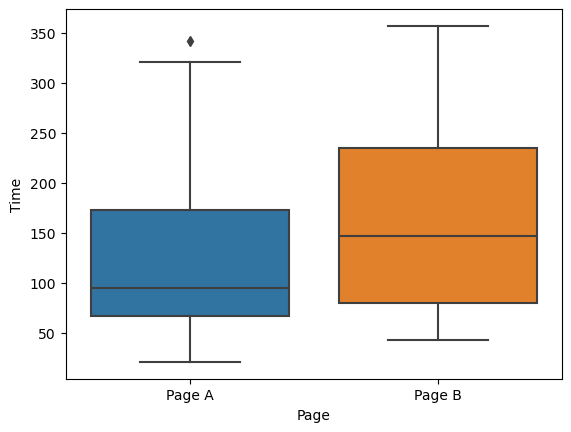

In [4]:
sns.boxplot(data= session_times, y= 'Time', x= 'Page')
plt.show()

In [5]:
time_a= session_times.loc[(session_times['Page'] == 'Page A'), 'Time'].mean()
time_b= session_times.loc[(session_times['Page'] == 'Page B'), 'Time'].mean()

print(f'mean time a: {time_a}')
print(f'mean time b: {time_b}')
print(f'difference: {time_b - time_a}')

mean time a: 126.33333333333333
mean time b: 162.0
difference: 35.66666666666667


In [6]:
session_times['Page'].value_counts()

Page
Page A    21
Page B    15
Name: count, dtype: int64

In [7]:
def perm_fun(df, nA, nB):
    idx_A= sorted(df.sample(n= nA, replace= False).index)
    idx_B= df.index[~(df.index.isin(idx_A))]
    print(idx_A)
    print(idx_B)

perm_fun(session_times, 21, 15)

[0, 1, 3, 4, 9, 10, 11, 12, 13, 14, 16, 21, 22, 23, 24, 25, 27, 28, 29, 30, 34]
Index([2, 5, 6, 7, 8, 15, 17, 18, 19, 20, 26, 31, 32, 33, 35], dtype='int64')


In [9]:
def perm_fun(df, nA, nB):
    idx_A= sorted(df.sample(n= nA, replace= False).index)
    idx_B= df.index[~(df.index.isin(idx_A))]
    mean= df.iloc[idx_B].mean() - df.iloc[idx_A].mean()
    # mean = b-a because b is bigger in original sample
    return mean

perm_fun(session_times, 21, 15)

TypeError: Could not convert ['Page APage BPage BPage APage APage APage BPage APage BPage BPage APage APage APage APage A'] to numeric

C:\Users\Anjelito\AppData\Local\Temp\ipykernel_17508\3594120095.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean= df.iloc[idx_B].mean() - df.iloc[idx_A].mean()


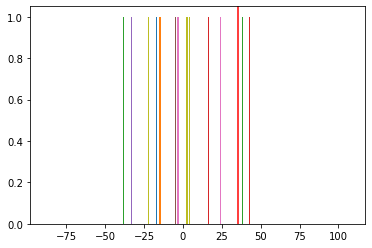

In [ ]:
perm_diffs= [
    perm_fun(session_times, 21, 15) for _ in range(1000)
]

plt.hist(perm_diffs, bins= 10)

plt.axvline(x= (time_b - time_a), color= 'red')
plt.show()

In [10]:
# area of curve to the right of line
np.mean(perm_diffs > (time_b - time_a))

NameError: name 'perm_diffs' is not defined

## Statistical Significance and p-Values

- **p-value**<br>
Given a chance model that embodies the null hypothesis, the p-value is the prob‐
ability of obtaining results as unusual or extreme as the observed results.<br>

- **Alpha**<br>
The probability threshold of “unusualness” that chance results must surpass for
actual outcomes to be deemed statistically significant.<br>
- **Type 1 error**<br>
Mistakenly concluding an effect is real (when it is due to chance).<br>
- **Type 2 error**<br>
Mistakenly concluding an effect is due to chance (when it is real).

In [ ]:
ab_testing= pd.DataFrame({
    'outcome': ['conv', 'no conv'],
    'price a': [200, 23539],
    'price b': [182, 22406]
})
ab_testing

,outcome,price a,price b
0,conv,200,182
1,no conv,23539,22406


In [12]:
conv_a, conv_b= (ab_testing.iloc[0, 1:] / ab_testing.sum(axis= 0)[1:]).values
conv_a, conv_b= conv_a * 100, conv_b * 100
print(f'diff: {conv_a - conv_b}')
conv_a, conv_b

diff: 0.03675791182059274


(0.8424954715868402, 0.8057375597662475)

If the two prices share the same conversion rate, could chance variation produce a difference as big as 5%?

1. Put cards labeled 1 and 0 in a box: this represents the supposed shared conver‐
sion rate of 382 ones and 45,945 zeros = 0.008246 = 0.8246%.
2. Shuffle and draw out a resample of size 23,739 (same n as price A), and record
how many 1s.
3. Record the number of 1s in the remaining 22,588 (same n as price B).
4. Record the difference in proportion of 1s.
5. Repeat steps 2–4.
6. How often was the difference >= 0.0368?

In [13]:
ab_testing[['price a', 'price b']].sum(axis= 1)

0      382
1    45945
dtype: int64

In [14]:
ab_testing[['price a', 'price b']].sum(axis= 0)

price a    23739
price b    22588
dtype: int64

In [15]:
obs_perc_diff= conv_a - conv_b
print(f'observed pct diff: {obs_perc_diff}')

conversion= [1] * 382 # simulate conversion
conversion.extend([0] * 45945) # simulate no conversion
conversion= pd.Series(conversion) # convert to series so that it has index

100 * perm_fun(conversion, 23739, 22588) # resample to price a and price b

observed pct diff: 0.03675791182059274


0.04099854944420098

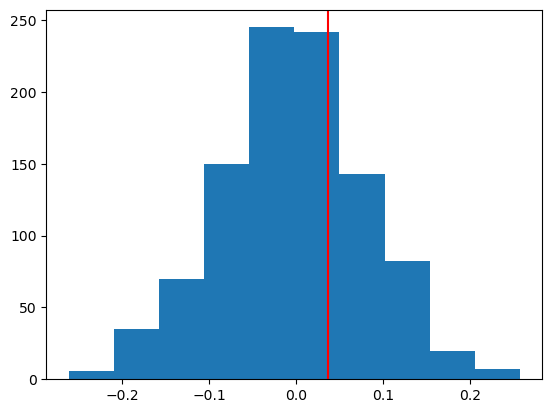

p-value:
0.32


In [16]:
perm_diffs= [100 * perm_fun(conversion, 23739, 22588) for i in range(1000)]

plt.hist(perm_diffs, bins= 10)

plt.axvline(x= obs_perc_diff, color= 'red')
plt.show()

print('p-value:')
print(
    np.mean([
        diff > obs_perc_diff for diff in perm_diffs
    ])
)

In [17]:
ab_testing

,outcome,price a,price b
0,conv,200,182
1,no conv,23539,22406


In [18]:
# use binomial dist to approximate p-value

survivors= np.array([[200, 23539], [182, 22406]])
chi2, p, dof, ex= stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p / 2:.4f}')

p-value for single sided test: 0.3498


## Alpha

> The probability that, given a chance model, results as extreme as the observed results
could occur.

## t-Test

In [19]:
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [20]:
time_a= session_times.loc[(session_times['Page'] == 'Page A'), 'Time']
time_b= session_times.loc[(session_times['Page'] == 'Page B'), 'Time']

res= stats.ttest_ind(time_a, time_b, equal_var= False)
res

TtestResult(statistic=-1.098315562363811, pvalue=0.2815243724570064, df=27.693370059531322)

In [21]:
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


## ANOVa

- **Pairwise comparison**<br>
A hypothesis test (e.g., of means) between two groups among multiple groups.<br>

- **Omnibus test**<br>
A single hypothesis test of the overall variance among multiple group means.<br>

- **Decomposition of variance**<br>
Separation of components contributing to an individual value (e.g., from the
overall average, from a treatment mean, and from a residual error).<br>

- **F-statistic**<br>
A standardized statistic that measures the extent to which differences among
group means exceed what might be expected in a chance model.<br>

- **SS**<br>
“Sum of squares,” referring to deviations from some average value.

1. Combine all the data together in a single box.
2. Shuffle and draw out four resamples of five values each.
3. Record the mean of each of the four groups.
4. Record the variance among the four group means.
5. Repeat steps 2–4 many (say, 1,000) times.

In [22]:
data= {
    'Page 1': [164, 172, 177, 156, 195],
    'Page 2': [178, 191, 182, 185, 177],
    'Page 3': [175, 193, 171, 163, 176],
    'Page 4': [155, 166, 164, 170, 168], 
}

web= pd.DataFrame(data)
web

,Page 1,Page 2,Page 3,Page 4
0,164,178,175,155
1,172,191,193,166
2,177,182,171,164
3,156,185,163,170
4,195,177,176,168


In [23]:
web= web.melt()
web.columns = ['page', 'time']
web.head()

,page,time
0,Page 1,164
1,Page 1,172
2,Page 1,177
3,Page 1,156
4,Page 1,195


In [24]:
observed_variance = web.groupby('page').mean().var()[0]
print('Observed means:', web.groupby('page').mean().values.ravel())
print('Variance:', observed_variance)

times= web['time']

def perm_test(df):
    df= df.copy()
    df['time']= np.random.permutation(times)
    mean= df.groupby('page').mean()
    var= np.var(mean, ddof= 1)
    return var

variances= [perm_test(web) for i in range(1000)]
pr_prob= np.sum(variances > observed_variance) / 1000

print(f'pr(prob) is {pr_prob}')

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655


/tmp/ipykernel_9253/3599953852.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  observed_variance = web.groupby('page').mean().var()[0]
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do n

pr(prob) is 0.084


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar

## f Statistics

In [29]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd

four_sessions= pd.read_csv(data_dir /"four_sessions.csv")

model = smf.ols('Time ~ Page', data=four_sessions).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


## chi-Square

- **Chi-square statistic**<br>
A measure of the extent to which some observed data departs from expectation.<br>

- **Expectation or expected**<br>
How we would expect the data to turn out under some assumption, typically the
null hypothesis.

In [30]:
# Suppose you are testing three different headlines—A, B, and C—and you run them
# each on 1,000 visitors, with the results shown in Table 3-4

dict= {
    'click': [14, 8, 12],
    'no_click': [986, 992, 988],
}

df_headline_or= pd.DataFrame(dict).transpose()
df_headline_or.columns= ['a', 'b', 'c']
df_headline_or

,a,b,c
click,14,8,12
no_click,986,992,988


A resampling procedure can test whether
the click rates differ to an extent greater than chance might cause. For this test, we
need to have the “expected” distribution of clicks, and in this case, that would be
under the null hypothesis assumption that all three headlines share the same click
rate, for an overall click rate of 34/3,000. Under this assumption, our contingency
table would look like Table 3-5

In [31]:
# Expected if all three headlines have the same click rate (null hypothesis)

df_headline_null= df_headline_or.copy()
mean= df_headline_null.mean(axis= 1)

for col in df_headline_null.columns:
    df_headline_null[col]= mean

df_headline_null

,a,b,c
click,11.333333,11.333333,11.333333
no_click,988.666667,988.666667,988.666667


$ R= \frac{Observed - Expected}{\sqrt{Expected}}$

In [32]:
df_pearson_res= (df_headline_or - df_headline_null) / np.sqrt(df_headline_null)
df_pearson_res

,a,b,c
click,0.792118,-0.990148,0.198030
no_click,-0.084809,0.106012,-0.021202


The chi-square statistic is defined as the sum of the squared Pearson residuals:

$ X= \sum_{i}^{r}\sum_{j}^{c}R^2 $

where r and c are the number of rows and columns, respectively.

In [33]:
x= np.square(df_pearson_res).sum().sum()
print(f'X= {x}')

X= 1.6659394708658917


 Is that more than could reasonably occur in a chance
model?

We can test with this resampling algorithm:
1. Constitute a box with 34 ones (clicks) and 2,966 zeros (no clicks).
2. Shuffle, take three separate samples of 1,000, and count the clicks in each.
3. Find the squared differences between the shuffled counts and the expected
counts and sum them.
4. Repeat steps 2 and 3, say, 1,000 times.
5. How often does the resampled sum of squared deviations exceed the observed?
That’s the p-value

In [34]:
import random

box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(df_headline_or.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
    sum(random.sample(box, 1000)),
    sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]
resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)

print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4845


The distribution of the chi-square statistic can be approximated by a chi-square distribution. The appropriate standard chi-square distribution is determined by the
degrees of freedom. For a contingency table,
the degrees of freedom are related to the number of rows (r) and columns (c) as
follows:
- degrees of freedom = (r − 1) × (c − 1)

In [35]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_headline_or)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


The chi-square distribution is a good approximation of the shuffled resampling test
just described, except when counts are extremely low (single digits, especially five or
fewer).

## Multi-arm Bandit
An imaginary slot machine with multiple arms for the customer to choose from, each with different payoffs, here taken to be an analogy for a multitreatment experiment.

- **Arm**: A treatment in an experiment (e.g., “headline A in a web test”).

- **Win**: The experimental analog of a win at the slot machine (e.g., “customer clicks on the link”)

Suppose further that you initially try each
arm 50 times and get the following results:
- Arm A: 10 wins out of 50
- Arm B: 2 win out of 50
- Arm C: 4 wins out of 50

One extreme approach is to say, “Looks like arm A is a winner—let’s quit trying the
other arms and stick with A.” This takes full advantage of the information from the
initial trial. If A is truly superior, we get the benefit of that early on. On the other
hand, if B or C is truly better, we lose any opportunity to discover that. Another
extreme approach is to say, “This all looks to be within the realm of chance—let’s
keep pulling them all equally.” This gives maximum opportunity for alternates to A to
show themselves. However, in the process, we are deploying what seem to be inferior
treatments. How long do we permit that? Bandit algorithms take a hybrid approach:
we start pulling A more often, to take advantage of its apparent superiority, but we
don’t abandon B and C. We just pull them less often. If A continues to outperform,
we continue to shift resources (pulls) away from B and C and pull A more often. If,
on the other hand, C starts to do better, and A starts to do worse, we can shift pulls
from A back to C. If one of them turns out to be superior to A and this was hidden in
the initial trial due to chance, it now has an opportunity to emerge with further
testing.

Bandit algorithms can efficiently handle 3+ treatments and move toward optimal
selection of the “best.” For traditional statistical testing procedures, the complexity of
decision making for 3+ treatments far outstrips that of the traditional A/B test, and
the advantage of bandit algorithms is much greater.

## Power and Sample Size

- **Effect size**

The minimum size of the effect that you hope to be able to detect in a statistical
test, such as “a 20% improvement in click rates.”

- **Power**

The probability of detecting a given effect size with a given sample size.

*For example, we might say (hypothetically) that the
probability of distinguishing between a .330 hitter and a .200 hitter in 25 at-bats is
0.75. The effect size here is a difference of .130. And “detecting” means that a hypoth‐
esis test will reject the null hypothesis of “no difference” and conclude there is a real
effect. So the experiment of 25 at-bats (n = 25) for two hitters, with an effect size of
0.130, has (hypothetical) power of 0.75, or 75%.*

- **Significance level**

The statistical significance level at which the test will be conducted

**The bigger the actual difference between treatments A and B, the greater the probability that our experiment will reveal it; and the smaller the difference, the more data will be needed to detect it**

In summary, for calculating power or required sample size, there are four moving
parts:<br>
    • Sample size<br>
    • Effect size you want to detect<br>
    • Significance level (alpha) at which the test will be conducted<br>
    • Power<br>

### Sample Size

Suppose you are looking at click-through rates (clicks as a percentage of exposures), and testing a new ad against an existing ad. How many clicks do you need to accumulate in the study?

For example, suppose current click-through rates are about 1.1%, and you are seeking
a 10% boost to 1.21%. So we have two boxes: box A with 1.1% ones (say, 110 ones and
9,890 zeros), and box B with 1.21% ones (say, 121 ones and 9,879 zeros)

In [36]:
import statsmodels.api as sm

effect_size = sm.stats.proportion_effectsize(0.0121, 0.0110) 
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
print('Sample Size per group: %.3f' % result)

Sample Size per group: 116602.393


In [37]:
effect_size = sm.stats.proportion_effectsize(0.0110 * 1.5, 0.0110) 
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
print('Sample Size per group: %.3f' % result)

Sample Size per group: 5488.408


- Finding out how big a sample size you need requires thinking ahead to the statistical test you plan to conduct.
- You must specify the minimum size of the effect that you want to detect.
- You must also specify the required probability of detecting that effect size (power).
- Finally, you must specify the significance level (alpha) at which the test will be conducted.